# Demo LoFTR-DS on a single pair of images

This notebook shows how to use the loftr matcher with default config(dual-softmax) and the pretrained weights.

In [1]:
import os
os.chdir("..")
from copy import deepcopy

import torch
import cv2
import numpy as np
import matplotlib.cm as cm
from src.utils.plotting import make_matching_figure

/media/testmony/2TB_SSD/miniconda3/envs/conda_imc2022/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Indoor Example

In [2]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
_default_cfg = deepcopy(default_cfg)
_default_cfg['coarse']['temp_bug_fix'] = True  # set to False when using the old ckpt
matcher = LoFTR(config=_default_cfg)
#matcher.load_state_dict(torch.load("checkpoints/indoor_ds_new.ckpt")['state_dict'])
matcher.load_state_dict(torch.load("checkpoints/indoor.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

In [3]:
# Load example images
img0_pth = "assets/scannet_sample_images/scene0711_00_frame-001680.jpg"
img1_pth = "assets/scannet_sample_images/scene0711_00_frame-001995.jpg"
img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
img0_raw = cv2.resize(img0_raw, (640, 480))
img1_raw = cv2.resize(img1_raw, (640, 480))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

/media/testmony/2TB_SSD/miniconda3/envs/conda_imc2022/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


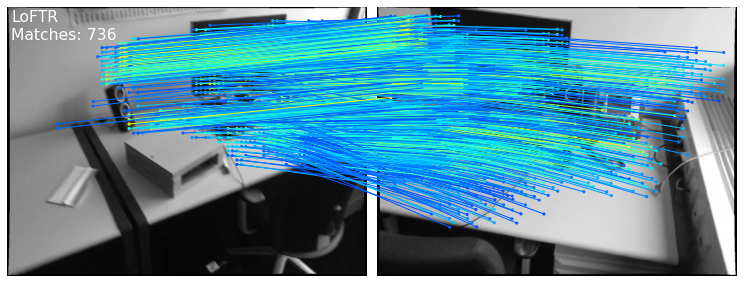

In [4]:
# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)

## Outdoor Example

In [5]:
from src.loftr import LoFTR, default_cfg

# The default config uses dual-softmax.
# The outdoor and indoor models share the same config.
# You can change the default values like thr and coarse_match_type.
matcher = LoFTR(config=default_cfg)
matcher.load_state_dict(torch.load("checkpoints/outdoor.ckpt")['state_dict'])
matcher = matcher.eval().cuda()

In [6]:
default_cfg['coarse']

{'d_model': 256,
 'd_ffn': 256,
 'nhead': 8,
 'layer_names': ['self',
  'cross',
  'self',
  'cross',
  'self',
  'cross',
  'self',
  'cross'],
 'attention': 'linear',
 'temp_bug_fix': False,
 'block_type': 'quadtree',
 'attn_type': 'B',
 'topks': [32, 16, 16]}

In [7]:
import imutils
def resize_keep_ratio(img, longest_size=640):
    height, width = img.shape[:2]
    #if np.maximum(height, width) <= longest_size: # no need to resize
    #    return img
    
    if height >= width:
        resized_img = imutils.resize(img, height=longest_size,inter=cv2.INTER_LINEAR)
    else:
        resized_img = imutils.resize(img, width=longest_size,inter=cv2.INTER_LINEAR)
    return resized_img

In [18]:
# Load example images
#img0_pth = "assets/phototourism_sample_images/united_states_capitol_26757027_6717084061.jpg"
#img1_pth = "assets/phototourism_sample_images/united_states_capitol_98169888_3347710852.jpg"


# img0_pth = "assets/kg-imc2022-test/1cf87530/0143f47ee9e54243a1b8454f3e91621a.png"
# img1_pth = "assets/kg-imc2022-test/1cf87530/a5a9975574c94ff9a285f58c39b53d2c.png"

#img0_pth = "assets/kg-imc2022-test/6ceaefff/0303b05ca0cb46959eac430e4b2472ca.png"
#img1_pth = "assets/kg-imc2022-test/6ceaefff/39563e58b2b7411da3f06427c9ee4239.png"

# img0_pth = "assets/kg-imc2022-test/d91db836/0006b1337a0347f49b4e651c035dfa0e.png"
# img1_pth = "assets/kg-imc2022-test/d91db836/81dd07fb7b9a4e01996cee637f91ca1a.png"


img0_pth = "assets/kg-imc2022-test/challenge-train-set/89564939_2696494838.jpg"
img1_pth = "assets/kg-imc2022-test/challenge-train-set/67819981_1436729072.jpg"

img0_raw = cv2.imread(img0_pth, cv2.IMREAD_GRAYSCALE)
img1_raw = cv2.imread(img1_pth, cv2.IMREAD_GRAYSCALE)
#img0_raw = resize_keep_ratio(img0_raw)
#img1_raw = resize_keep_ratio(img1_raw)
img0_raw = cv2.resize(img0_raw, (480, 640))
img1_raw = cv2.resize(img1_raw, (480, 640))
#img0_raw = cv2.resize(img0_raw, (img0_raw.shape[1]//8*8, img0_raw.shape[0]//8*8))  # input size shuold be divisible by 8
#img1_raw = cv2.resize(img1_raw, (img1_raw.shape[1]//8*8, img1_raw.shape[0]//8*8))

img0 = torch.from_numpy(img0_raw)[None][None].cuda() / 255.
img1 = torch.from_numpy(img1_raw)[None][None].cuda() / 255.
batch = {'image0': img0, 'image1': img1}

# Inference with LoFTR and get prediction
with torch.no_grad():
    matcher(batch)
    mkpts0 = batch['mkpts0_f'].cpu().numpy()
    mkpts1 = batch['mkpts1_f'].cpu().numpy()
    mconf = batch['mconf'].cpu().numpy()

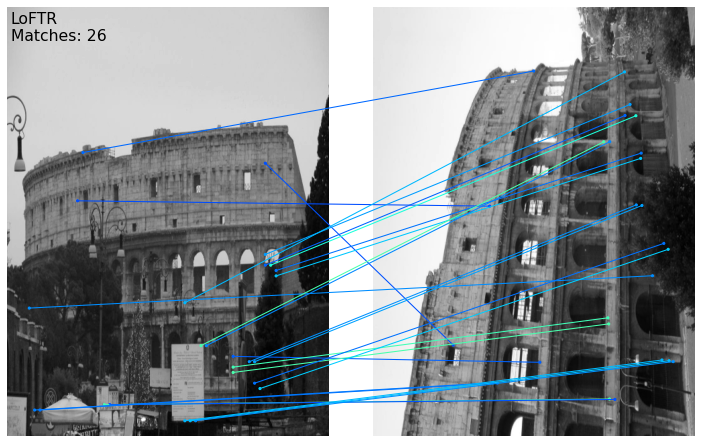

In [19]:
# Draw
color = cm.jet(mconf)
text = [
    'LoFTR',
    'Matches: {}'.format(len(mkpts0)),
]
fig = make_matching_figure(img0_raw, img1_raw, mkpts0, mkpts1, color, text=text)